## **Лабораторная работа 6**

#### No1 (2 балла)
Изучите материал https://cloud.mail.ru/public/S4Pu/zPnKHX7qT. Выполните задания из
файла https://cloud.mail.ru/public/KtLN/hjdfs92YL.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь


[Ссылка на документацию](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)

In [2]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0,
             396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2,
             342.2, 360.8, 368.0, 391.2, 390.8])


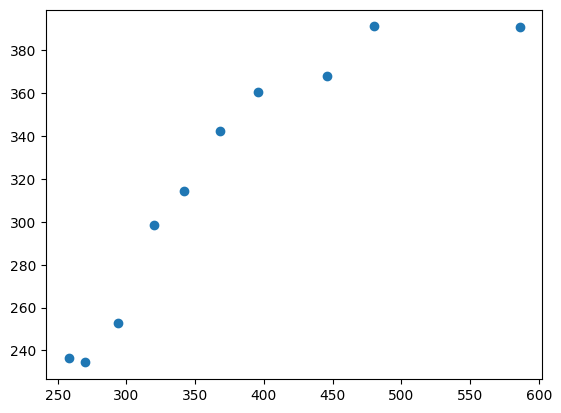

In [3]:
plt.scatter(X, y)


In [4]:
lr = LinearRegression()  # Линейная регрессия
lr.fit(X, y)  # Обучим линейную регрессию


LinearRegression()

In [5]:
X_ = np.arange(250, 600, 10)[:, np.newaxis]  # Точки для предсказания
y_lr = lr.predict(X_)  # Предсказываем y для линейной регрессии


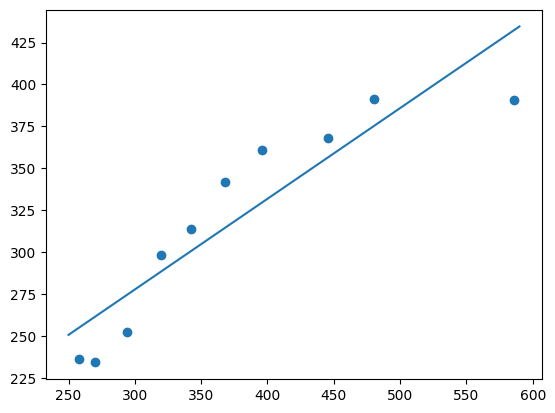

In [6]:
plt.scatter(X, y)
plt.plot(X_, y_lr)


In [7]:
pr = LinearRegression()  # Полиномиальная регрессия


In [8]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные


In [9]:
pr.fit(X_quad, y)  # Обучаем полиномиальную регрессию


LinearRegression()

In [10]:
# Предсказываем y для полиномиальной регрессии
y_pr = pr.predict(quadratic.fit_transform(X_))


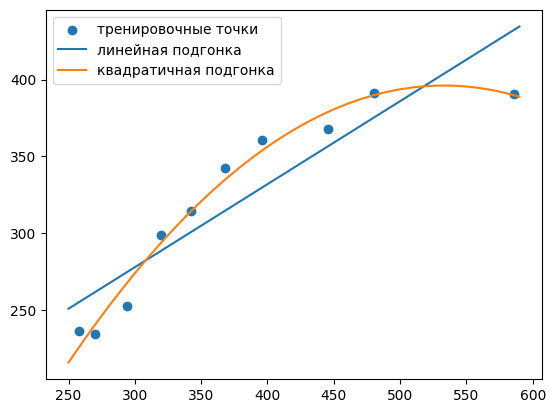

In [11]:
plt.scatter(X, y, label='тренировочные точки')
plt.plot(X_, y_lr, label='линейная подгонка')
plt.plot(X_, y_pr, label='квадратичная подгонка')
plt.legend(loc='upper left')
plt.show()


##### Задание 1. Оцените полученные модели с помощью коэффициента детерминации и MSE. Что можно сказать о качестве моделей?

In [12]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X)
print('Для линейной регрессии: \nMSE:', mean_squared_error(y, y_pred))
print("к. детерминации:", lr.score(X, y))

y_pred = pr.predict(quadratic.fit_transform(X))
print('\nДля полиномиальной регрессии: \nMSE:', mean_squared_error(y, y_pred))
print("к. детерминации:", pr.score(quadratic.fit_transform(X), y))


Для линейной регрессии: 
MSE: 569.7796663183207
к. детерминации: 0.8317053837891232

Для полиномиальной регрессии: 
MSE: 61.330214517447324
к. детерминации: 0.9818850241163605


Лучше подходит полиномиальная регрессия

##### Задание 2. Постройте полиномиальную модель, описывающую следующую зависимость:

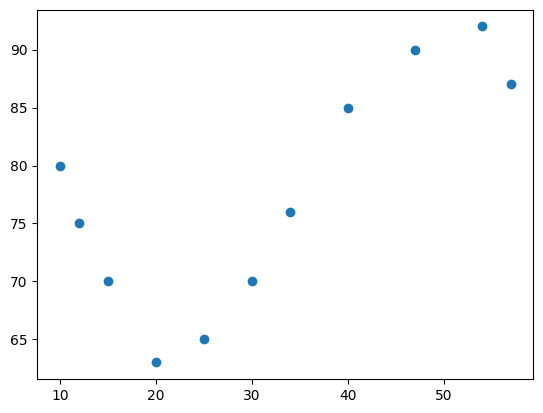

In [13]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87])

plt.scatter(x, y)  # Изображаем точки на графике
plt.show()


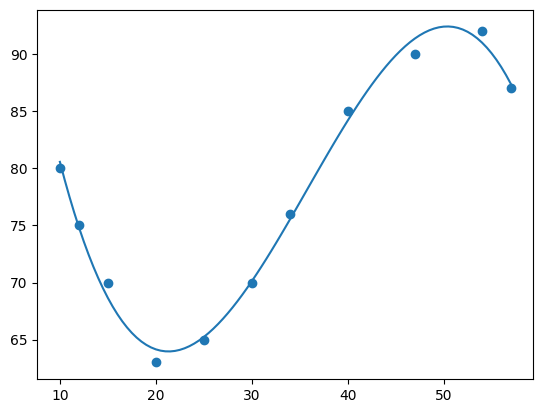

In [14]:
def poly(degree):
    pr = LinearRegression()
    quadratic = PolynomialFeatures(degree=degree)
    x_ = np.arange(10, 57.5, 0.5)[:, np.newaxis]
    x_quad = quadratic.fit_transform(x)
    pr.fit(x_quad, y)

    y_pr = pr.predict(quadratic.fit_transform(x_))

    plt.scatter(x, y)
    plt.plot(x_, y_pr)
    plt.show()


poly(4)


##### Задание 3. Какую степень полинома вы использовали? **4** 
Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат?

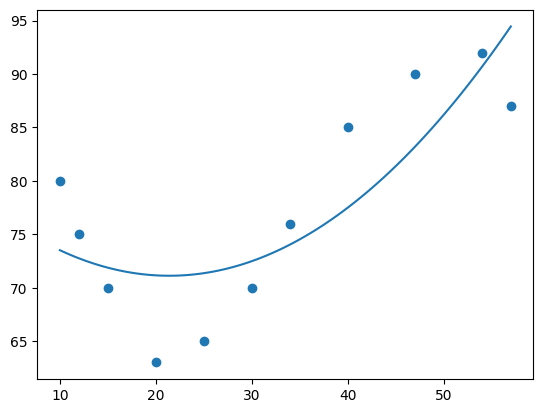

In [15]:
poly(2)


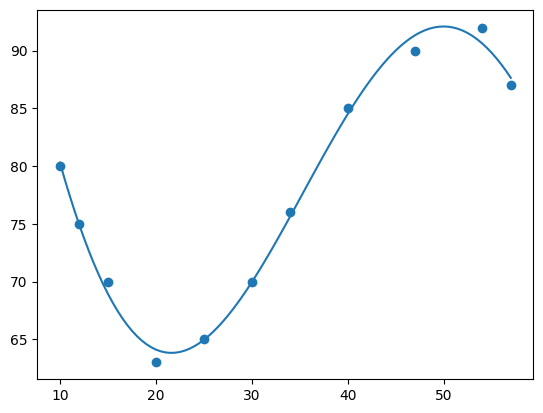

In [16]:
poly(5)


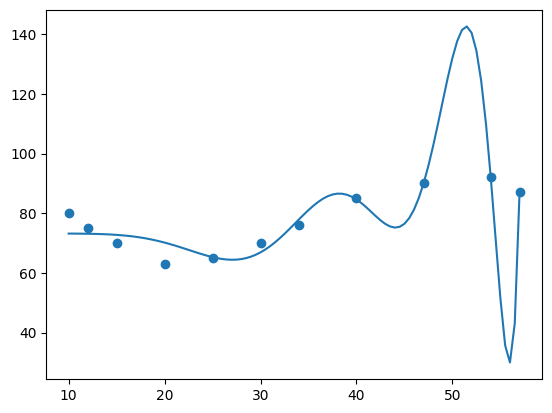

In [17]:
poly(15)


При степени 2 - недообучение

При степени 15 - переобучение